<a href="https://colab.research.google.com/github/Kate5-7-2021/INFO-5502-SU2021/blob/main/INFO_5502_Assign8_Develope_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd        #import necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsRegressor, NeighborhoodComponentsAnalysis)
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats

In [2]:
df_i=pd.read_csv('/content/us_state_vaccinations.csv', delimiter=',', encoding='latin1')
df_i          #read csv dataset

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,2021-07-30,Wyoming,446581.0,528245.0,240961.0,36.61,77.16,211874.0,41.63,91.27,771.0,697.0,1204.0,0.845
13279,2021-07-31,Wyoming,447473.0,529845.0,241610.0,36.67,77.32,212230.0,41.75,91.55,892.0,697.0,1204.0,0.845
13280,2021-08-01,Wyoming,447594.0,529845.0,241735.0,36.68,77.34,212317.0,41.77,91.55,121.0,697.0,1204.0,0.845
13281,2021-08-02,Wyoming,447616.0,529845.0,241769.0,36.69,77.34,212334.0,41.77,91.55,22.0,694.0,1199.0,0.845


In [3]:
df_i.shape      #to find number of rows and columns

(13283, 14)

In [4]:
df_i.info()         #Columns' information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 13283 non-null  object 
 1   location                             13283 non-null  object 
 2   total_vaccinations                   12883 non-null  float64
 3   total_distributed                    12675 non-null  float64
 4   people_vaccinated                    12663 non-null  float64
 5   people_fully_vaccinated_per_hundred  11957 non-null  float64
 6   total_vaccinations_per_hundred       12059 non-null  float64
 7   people_fully_vaccinated              12581 non-null  float64
 8   people_vaccinated_per_hundred        12034 non-null  float64
 9   distributed_per_hundred              12046 non-null  float64
 10  daily_vaccinations_raw               13218 non-null  float64
 11  daily_vaccinations          

In [5]:
df_i.describe()  #numerical values' statistics

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
count,1.288300e+04,1.267500e+04,1.266300e+04,11957.000000,12059.000000,1.258100e+04,12034.000000,12046.000000,1.321800e+04,1.321800e+04,12371.000000,12675.000000
mean,6.393010e+06,7.895230e+06,3.749922e+06,26.487264,59.993119,2.796865e+06,34.951431,75.397603,5.309133e+04,5.308615e+04,4872.832350,0.761316
std,2.863596e+07,3.502084e+07,1.657265e+07,17.917093,35.359693,1.317393e+07,18.784258,39.821758,2.392133e+05,2.300846e+05,3078.629711,0.139168
min,4.160000e+02,6.000000e+03,4.010000e+02,0.000000,0.170000,1.000000e+00,0.240000,6.140000,-3.316400e+05,-3.511300e+04,-16746.000000,0.043000
25%,4.360315e+05,6.104750e+05,2.901775e+05,9.820000,27.715000,1.214910e+05,18.002500,37.945000,1.977750e+03,3.776500e+03,2394.500000,0.712000
50%,1.525794e+06,1.890870e+06,9.127080e+05,27.340000,63.060000,6.166240e+05,37.035000,83.410000,1.061600e+04,1.294750e+04,4314.000000,0.791000
75%,4.416498e+06,5.223665e+06,2.466296e+06,40.340000,87.410000,1.855140e+06,49.150000,106.350000,3.402275e+04,3.550300e+04,6850.000000,0.849000
max,3.473771e+08,4.012300e+08,1.921206e+08,76.090000,148.960000,1.650814e+08,86.420000,159.990000,4.629928e+06,3.384387e+06,27652.000000,1.105000


In [6]:
df_1=df_i[['date','location','total_vaccinations','total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred']]
df_1     #create sub-dataframe from main data frame

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_fully_vaccinated_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,7270.0,NaN,0.15,7.69
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,9245.0,5906.0,0.19,7.73
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,7083.0,NaN,8.88
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,13488.0,7478.0,0.28,9.07
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,7498.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13278,2021-07-30,Wyoming,446581.0,528245.0,240961.0,211874.0,697.0,36.61,91.27
13279,2021-07-31,Wyoming,447473.0,529845.0,241610.0,212230.0,697.0,36.67,91.55
13280,2021-08-01,Wyoming,447594.0,529845.0,241735.0,212317.0,697.0,36.68,91.55
13281,2021-08-02,Wyoming,447616.0,529845.0,241769.0,212334.0,694.0,36.69,91.55


In [7]:
df_1.shape   #row and column of the sub-Dataframe

(13283, 9)

In [8]:
df_1.info()       #show the type and the number of the non_null objects for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 13283 non-null  object 
 1   location                             13283 non-null  object 
 2   total_vaccinations                   12883 non-null  float64
 3   total_distributed                    12675 non-null  float64
 4   people_vaccinated                    12663 non-null  float64
 5   people_fully_vaccinated              12581 non-null  float64
 6   daily_vaccinations                   13218 non-null  float64
 7   people_fully_vaccinated_per_hundred  11957 non-null  float64
 8   distributed_per_hundred              12046 non-null  float64
dtypes: float64(7), object(2)
memory usage: 934.1+ KB


In [9]:
df_1.isnull().sum()       #number of null values in each column

date                                      0
location                                  0
total_vaccinations                      400
total_distributed                       608
people_vaccinated                       620
people_fully_vaccinated                 702
daily_vaccinations                       65
people_fully_vaccinated_per_hundred    1326
distributed_per_hundred                1237
dtype: int64

In [10]:
df_1.describe()      #statistics of the numerical columns

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_fully_vaccinated_per_hundred,distributed_per_hundred
count,1.288300e+04,1.267500e+04,1.266300e+04,1.258100e+04,1.321800e+04,11957.000000,12046.000000
mean,6.393010e+06,7.895230e+06,3.749922e+06,2.796865e+06,5.308615e+04,26.487264,75.397603
std,2.863596e+07,3.502084e+07,1.657265e+07,1.317393e+07,2.300846e+05,17.917093,39.821758
min,4.160000e+02,6.000000e+03,4.010000e+02,1.000000e+00,-3.511300e+04,0.000000,6.140000
25%,4.360315e+05,6.104750e+05,2.901775e+05,1.214910e+05,3.776500e+03,9.820000,37.945000
50%,1.525794e+06,1.890870e+06,9.127080e+05,6.166240e+05,1.294750e+04,27.340000,83.410000
75%,4.416498e+06,5.223665e+06,2.466296e+06,1.855140e+06,3.550300e+04,40.340000,106.350000
max,3.473771e+08,4.012300e+08,1.921206e+08,1.650814e+08,3.384387e+06,76.090000,159.990000


In [11]:
df_1.duplicated().sum()      #show the duplicated values in the dataset

0

In [12]:
df_1.describe(include=['object'])

,date,location
count,13283,13283
unique,227,65
top,2021-06-19,United States
freq,65,227


In [13]:
df1=df_1.groupby(['location'])[['total_vaccinations','total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred']].agg([np.max, np.min, np.mean, np.std])
df1                       

total_vaccinations            ... distributed_per_hundred           
                             amax      amin  ...                    mean        std
location                                     ...                                   
Alabama                 3634744.0   78134.0  ...               65.788535  33.151044
Alaska                   699605.0   35838.0  ...               84.911162  33.165508
American Samoa            52214.0    2124.0  ...               79.377424  22.268316
Arizona                 7133606.0  141355.0  ...               73.114141  38.507235
Arkansas                2466403.0   40879.0  ...               66.120606  31.488118
...                           ...       ...  ...                     ...        ...
Virginia                9724507.0  190607.0  ...               76.864545  42.402303
Washington              9036298.0  195567.0  ...               77.852172  43.157714
West Virginia           1488339.0  103330.0  ...               72.749293  34.786757
Wisconsin               6182459.0  137253.0  ...               69.890606  36.373367
Wyoming                  447632.0   16467.0  ...               65.153232  28.666378

[65 rows x 28 columns]

In [14]:
my_imputer = SimpleImputer()
#df_imputed= my_imputer.fit_transform(df_1)
df_imputed= my_imputer.fit_transform(df_1[['total_vaccinations','total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred']])
df_imputed

array([[7.81340000e+04, 3.77025000e+05, 7.08610000e+04, ...,
        5.30861537e+04, 1.50000000e-01, 7.69000000e+00],
       [8.40400000e+04, 3.78975000e+05, 7.47920000e+04, ...,
        5.90600000e+03, 1.90000000e-01, 7.73000000e+00],
       [9.23000000e+04, 4.35350000e+05, 8.04800000e+04, ...,
        7.08300000e+03, 2.64872635e+01, 8.88000000e+00],
       ...,
       [4.47594000e+05, 5.29845000e+05, 2.41735000e+05, ...,
        6.97000000e+02, 3.66800000e+01, 9.15500000e+01],
       [4.47616000e+05, 5.29845000e+05, 2.41769000e+05, ...,
        6.94000000e+02, 3.66900000e+01, 9.15500000e+01],
       [4.47632000e+05, 5.31195000e+05, 2.41812000e+05, ...,
        6.93000000e+02, 3.66900000e+01, 9.17800000e+01]])

In [15]:
df=pd.DataFrame(df_imputed, columns=['total_vaccinations','total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred'])
df

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_fully_vaccinated_per_hundred,distributed_per_hundred
0,7.813400e+04,3.770250e+05,7.086100e+04,7.270000e+03,53086.15373,0.150000,7.690000
1,8.404000e+04,3.789750e+05,7.479200e+04,9.245000e+03,5906.00000,0.190000,7.730000
2,9.230000e+04,4.353500e+05,8.048000e+04,2.796865e+06,7083.00000,26.487264,8.880000
3,1.005670e+05,4.446500e+05,8.695600e+04,1.348800e+04,7478.00000,0.280000,9.070000
4,6.393010e+06,7.895230e+06,3.749922e+06,2.796865e+06,7498.00000,26.487264,75.397603
...,...,...,...,...,...,...,...
13278,4.465810e+05,5.282450e+05,2.409610e+05,2.118740e+05,697.00000,36.610000,91.270000
13279,4.474730e+05,5.298450e+05,2.416100e+05,2.122300e+05,697.00000,36.670000,91.550000
13280,4.475940e+05,5.298450e+05,2.417350e+05,2.123170e+05,697.00000,36.680000,91.550000
13281,4.476160e+05,5.298450e+05,2.417690e+05,2.123340e+05,694.00000,36.690000,91.550000


In [16]:
df=df.join(df_1[['date','location']])
df

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_fully_vaccinated_per_hundred,distributed_per_hundred,date,location
0,7.813400e+04,3.770250e+05,7.086100e+04,7.270000e+03,53086.15373,0.150000,7.690000,2021-01-12,Alabama
1,8.404000e+04,3.789750e+05,7.479200e+04,9.245000e+03,5906.00000,0.190000,7.730000,2021-01-13,Alabama
2,9.230000e+04,4.353500e+05,8.048000e+04,2.796865e+06,7083.00000,26.487264,8.880000,2021-01-14,Alabama
3,1.005670e+05,4.446500e+05,8.695600e+04,1.348800e+04,7478.00000,0.280000,9.070000,2021-01-15,Alabama
4,6.393010e+06,7.895230e+06,3.749922e+06,2.796865e+06,7498.00000,26.487264,75.397603,2021-01-16,Alabama
...,...,...,...,...,...,...,...,...,...
13278,4.465810e+05,5.282450e+05,2.409610e+05,2.118740e+05,697.00000,36.610000,91.270000,2021-07-30,Wyoming
13279,4.474730e+05,5.298450e+05,2.416100e+05,2.122300e+05,697.00000,36.670000,91.550000,2021-07-31,Wyoming
13280,4.475940e+05,5.298450e+05,2.417350e+05,2.123170e+05,697.00000,36.680000,91.550000,2021-08-01,Wyoming
13281,4.476160e+05,5.298450e+05,2.417690e+05,2.123340e+05,694.00000,36.690000,91.550000,2021-08-02,Wyoming


In [17]:
df.isnull().sum()       #number of null values in each column

total_vaccinations                     0
total_distributed                      0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
people_fully_vaccinated_per_hundred    0
distributed_per_hundred                0
date                                   0
location                               0
dtype: int64

In [18]:
df.shape

(13283, 9)

In [19]:
#df.boxplot(column=['total_vaccinations','total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred'])

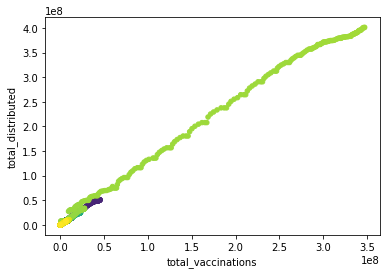

In [20]:
df.plot.scatter('total_vaccinations', 'total_distributed', c=df.index, 
                cmap=plt.cm.viridis, colorbar=False)
plt.show()

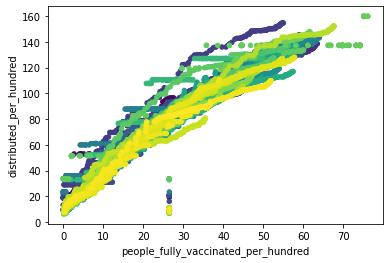

In [21]:
df.plot.scatter('people_fully_vaccinated_per_hundred' , 'distributed_per_hundred', c=df.index, 
                cmap=plt.cm.viridis, colorbar=False)
plt.show()

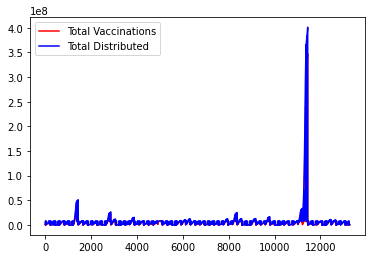

In [22]:
plt.plot(df['total_vaccinations'],label='Total Vaccinations',color='red')
plt.plot(df['total_distributed'],label='Total Distributed',color='blue')
plt.legend()

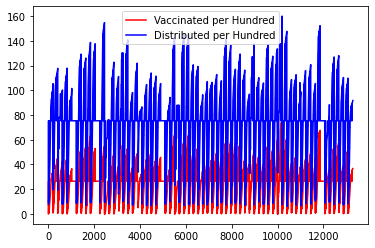

In [23]:
plt.plot(df['people_fully_vaccinated_per_hundred'],label='Vaccinated per Hundred',color='red')
plt.plot(df['distributed_per_hundred'],label='Distributed per Hundred',color='blue')
plt.legend()

In [24]:
#covid_data=df.to_csv
#covid_data

#**KNN Model**

In [25]:
x=df[['total_distributed','daily_vaccinations']].values  #define x & y
y=df['total_vaccinations'].values

In [26]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [27]:
#split dataset to train and test dataset          
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [28]:
x_train

array([[-0.22722589, -0.21490423],
       [-0.14592353, -0.07205347],
       [-0.18334117, -0.19063537],
       ...,
       [-0.21482477, -0.19936693],
       [-0.20244996, -0.10799055],
       [-0.22559765, -0.22675545]])

In [29]:
x_train.shape,y_train.shape

((10626, 2), (10626,))

In [30]:
x_test

array([[-0.13775892, -0.20826406],
       [-0.06411735, -0.20619446],
       [-0.21373397, -0.17165599],
       ...,
       [-0.13290576, -0.2096104 ],
       [-0.10309293, -0.19169414],
       [-0.23036399, -0.23129987]])

In [31]:
x_test.shape, y_test.shape

((2657, 2), (2657,))

In [32]:
y_train

array([ 103572., 2093895., 1091286., ...,  436290.,  268212.,  171089.])

In [33]:
y_test

array([2873721., 4663355.,  523269., ..., 2993638., 3708043.,    8185.])

In [34]:
knn=KNeighborsRegressor(n_neighbors=3)    #implement KNN model
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [35]:
print('KNN Score: %.5f' % knn.score(x_test,y_test)) #get KNN score

KNN Score: 0.99922


In [36]:
y_pred=knn.predict(x_test)     #define y_pred 
y_pred

array([2872713.        , 4659524.        ,  419207.33333333, ...,
       2990507.33333333, 4181484.33333333,    8185.        ])

In [37]:
knn.predict(x_test)[0:5]    #KNN model prediction

array([2872713.        , 4659524.        ,  419207.33333333,
       6393010.29519522, 1047708.        ])

In [38]:
knn1= KNeighborsRegressor(n_neighbors=30)   #KNN model tested with different k value
knn1.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [39]:
print('KNN Score: %.5f' % knn1.score(x_test,y_test))

KNN Score: 0.99756


In [40]:
#apply cross validation
knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=10)
knn_cross_test_scores

array([0.99909682, 0.99288124, 0.99823007, 0.99457322, 0.98806146,
       0.99886436, 0.98961102, 0.97243901, 0.99346961, 0.99829594])

In [41]:
#get the overall accuracy of the cross validation
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_test_scores.mean()*100, knn_cross_test_scores.std()))

99.26% accuracy with a standard deviation of 0.01


In [42]:
k_cv_score=[]             #call the k range in cross validation to find the optimal k value
k_cv_num=range(1,30)
for k in k_cv_num:
 knn= KNeighborsRegressor(n_neighbors=k)
 knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=10)
 k_cv_score.append(knn_cross_test_scores.mean())
print(k_cv_score)


[0.9926857328687195, 0.9928638793717427, 0.9925522759261417, 0.9907918527425824, 0.9898785591951749, 0.990006924072181, 0.9883735198784567, 0.9892959458309022, 0.9887126243943181, 0.9886461256838196, 0.9909992305870488, 0.9896132827170983, 0.9884535463379722, 0.986499437387635, 0.9799237725109673, 0.9749598418763709, 0.9652866587269392, 0.9528442601673361, 0.9408921641782545, 0.9310755711762615, 0.9166561341458938, 0.9072256818467853, 0.8993764014606409, 0.8893218931864396, 0.8771359695775836, 0.8695746166813969, 0.8551191578614528, 0.8509995327537737, 0.8471225952002213]


Text(0, 0.5, 'Cross Validation Accuracy')

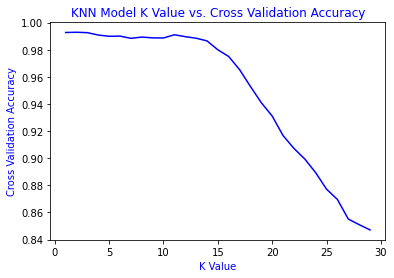

In [43]:
#draw the graph of accuracy for k range from the cross validation
plt.plot(k_cv_num,k_cv_score,color='b') 
plt.title('KNN Model K Value vs. Cross Validation Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Cross Validation Accuracy',color='b')

In [44]:
#apply cross validation
knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=5)
knn_cross_test_scores

array([0.82844426, 0.79057688, 0.79286323, 0.92616994, 0.69819816])

In [45]:
#get the overall accuracy of the cross validation
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_test_scores.mean()*100, knn_cross_test_scores.std()))

80.73% accuracy with a standard deviation of 0.07


In [46]:
k_cv_score=[]             #call the same k range in cross validation to find the optimal k value
k_cv_num=range(1,25)
for k in k_cv_num:
 knn= KNeighborsRegressor(n_neighbors=k)
 knn_cross_test_scores=cross_val_score(knn,x_test,y_test,cv=5)
 k_cv_score.append(knn_cross_test_scores.mean())
print(k_cv_score)

[0.9951261885578088, 0.9957620225821857, 0.9956091574245232, 0.9928509205022769, 0.9908362682362188, 0.9921310777823992, 0.9902041252116668, 0.989374040406792, 0.9860401639141658, 0.981495193543456, 0.9806114318740267, 0.9761355024862757, 0.972783528842248, 0.9692627245453798, 0.9604013091471751, 0.9510813786167871, 0.9409708358945659, 0.9295725988272778, 0.9203857199282272, 0.9086923890043976, 0.8973647932702351, 0.8842937226408027, 0.8722342778899475, 0.8590704359105865]


Text(0, 0.5, 'Cross Validation Accuracy')

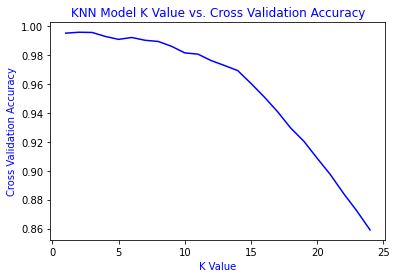

In [47]:
#draw the graph of accuracy for k range from the cross validation 
plt.plot(k_cv_num,k_cv_score,color='b') 
plt.title('KNN Model K Value vs. Cross Validation Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Cross Validation Accuracy',color='b')

In [48]:
x_t=df[['total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred']].values  #define x & y
y_t=df['total_vaccinations'].values

In [49]:
x_t=preprocessing.StandardScaler().fit(x_t).transform(x_t.astype(float))

In [50]:
#split dataset to train and test dataset          
x_t_train, x_t_test, y_t_train, y_t_test = train_test_split(x_t, y_t, test_size=0.20, random_state=4)

In [51]:
x_t_train.shape,y_t_train.shape

((10626, 6), (10626,))

In [52]:
x_t_test.shape, y_t_test.shape

((2657, 6), (2657,))

In [53]:
knn=KNeighborsRegressor(n_neighbors=3)    #implement KNN model
knn.fit(x_t_train,y_t_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [54]:
print('KNN Score: %.5f' % knn.score(x_t_test,y_t_test)) #get KNN score

KNN Score: 0.99980


In [55]:
#apply cross validation
knn_cross_test_scores=cross_val_score(knn,x_t_test,y_t_test,cv=10)
knn_cross_test_scores

array([0.99924085, 0.9937646 , 0.99835738, 0.99536852, 0.99684465,
       0.99908275, 0.9896602 , 0.99172252, 0.99397109, 0.9988322 ])

In [56]:
#get the overall accuracy of the cross validation
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_test_scores.mean()*100, knn_cross_test_scores.std()))

99.57% accuracy with a standard deviation of 0.00


In [57]:
k_cv_score=[]             #call the k range in cross validation to find the optimal k value
k_cv_num=range(1,30)
for k in k_cv_num:
 knn= KNeighborsRegressor(n_neighbors=k)
 knn_cross_test_scores=cross_val_score(knn,x_t_test,y_t_test,cv=10)
 k_cv_score.append(knn_cross_test_scores.mean())
print(k_cv_score)

[0.9970372909127496, 0.995951348379708, 0.9956844749101126, 0.9956670013339227, 0.9939819966322107, 0.9926189138536203, 0.992681689267377, 0.9921652874561795, 0.9907870527069063, 0.9897653991678222, 0.9910841035044955, 0.9912512291218954, 0.9915653810675821, 0.9896183590422177, 0.9861443296632897, 0.9843440759817549, 0.9814918615616663, 0.9790805812273493, 0.9735963878100475, 0.9668296073062225, 0.9600980526699325, 0.9521181650339858, 0.9441475332166162, 0.9356604060695084, 0.9268769000747856, 0.918024231266336, 0.9086739903957174, 0.8990187734215722, 0.8887537438589395]


Text(0, 0.5, 'Cross Validation Accuracy')

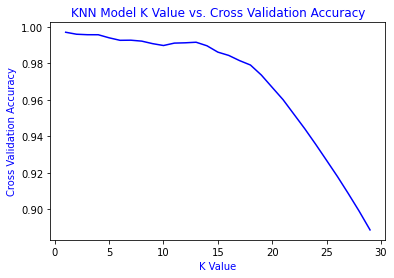

In [58]:
#draw the graph of accuracy for k range from the cross validation
plt.plot(k_cv_num,k_cv_score,color='b') 
plt.title('KNN Model K Value vs. Cross Validation Accuracy',color='b')
plt.xlabel('K Value',color='b')
plt.ylabel('Cross Validation Accuracy',color='b')

#**Linear Regression Model**

In [59]:
x1=df['total_distributed'].values  #define x & y 
y1=df['total_vaccinations'].values

In [60]:
#split dataset to train and test dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=4)

In [61]:
lin_reg = LinearRegression()                     #implement linear regression model
lin_reg.fit(x1_train.reshape(-1,1), y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#linear regression score
print('Linear Regression Score: %.5f' % lin_reg.score(x1_test.reshape(-1,1),y1_test))

Linear Regression Score: 0.99756


In [63]:
y1_pred = lin_reg.predict(x1_test.reshape(-1,1))

In [64]:
lin_reg.coef_      #find Coefficients

array([0.82295136])

In [65]:
lin_reg.intercept_

-105399.66607495025

In [66]:
metrics.mean_absolute_error(y1_test, y1_pred)

385035.7533439623

In [67]:
metrics.mean_squared_error(y1_test, y1_pred)

1609462456828.3213

In [68]:
r2_score(y1_test, y1_pred)

0.9975620895914804

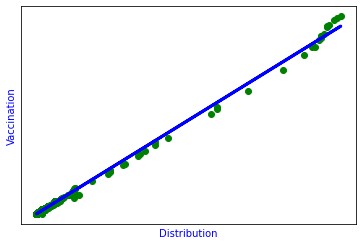

In [69]:
plt.scatter(x1_test.reshape(-1,1), y1_test,  color='green')
plt.plot(x1_test.reshape(-1,1), y1_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Distribution', color='b')
plt.ylabel('Vaccination', color='b')

plt.show()

In [70]:
x2=df['distributed_per_hundred'].values
y2=df['people_fully_vaccinated_per_hundred'].values

In [71]:
#split dataset to train and test dataset
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=4)

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(x2_train.reshape(-1,1), y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print('Linear Regression Score: %.5f' % lin_reg.score(x2_test.reshape(-1,1),y2_test))


Linear Regression Score: 0.92340


In [74]:
y2_pred = lin_reg.predict(x2_test.reshape(-1,1))

In [75]:
lin_reg.coef_

array([0.43019758])

In [76]:
lin_reg.intercept_

-5.9538265291096835

In [77]:
metrics.mean_absolute_error(y2_test, y2_pred)

3.1017203630741186

In [78]:
metrics.mean_squared_error(y2_test, y2_pred)

22.23366181275665

In [79]:
r2_score(y2_test, y2_pred)

0.9233984580811064

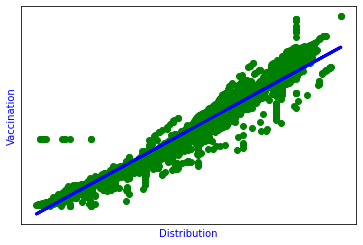

In [80]:
plt.scatter(x2_test.reshape(-1,1), y2_test, color='green')
plt.plot(x2_test.reshape(-1,1), y2_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Distribution', color='b')
plt.ylabel('Vaccination', color='b')

plt.show()

In [81]:
x_t=df[['total_distributed','people_vaccinated','people_fully_vaccinated','daily_vaccinations','people_fully_vaccinated_per_hundred','distributed_per_hundred']].values  #define x & y
x_t

array([[3.77025000e+05, 7.08610000e+04, 7.27000000e+03, 5.30861537e+04,
        1.50000000e-01, 7.69000000e+00],
       [3.78975000e+05, 7.47920000e+04, 9.24500000e+03, 5.90600000e+03,
        1.90000000e-01, 7.73000000e+00],
       [4.35350000e+05, 8.04800000e+04, 2.79686480e+06, 7.08300000e+03,
        2.64872635e+01, 8.88000000e+00],
       ...,
       [5.29845000e+05, 2.41735000e+05, 2.12317000e+05, 6.97000000e+02,
        3.66800000e+01, 9.15500000e+01],
       [5.29845000e+05, 2.41769000e+05, 2.12334000e+05, 6.94000000e+02,
        3.66900000e+01, 9.15500000e+01],
       [5.31195000e+05, 2.41812000e+05, 2.12359000e+05, 6.93000000e+02,
        3.66900000e+01, 9.17800000e+01]])

In [82]:
#split dataset to train and test dataset          
x_t_train, x_t_test, y_t_train, y_t_test = train_test_split(x_t, y_t, test_size=0.20, random_state=4)

In [83]:
y_t=df['total_vaccinations'].values
y_t

array([ 78134.,  84040.,  92300., ..., 447594., 447616., 447632.])

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(x_t_train, y_t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#linear regression score
print('Linear Regression Score: %.5f' % lin_reg.score(x_t_test,y_t_test))

Linear Regression Score: 0.99979


In [86]:
y_t_pred = lin_reg.predict(x_t_test)

In [87]:
lin_reg.coef_

array([ 4.21369559e-02,  1.12699205e+00,  6.97031475e-01, -2.24735809e+00,
       -1.85213284e+04,  8.56907904e+03])

In [88]:
lin_reg.intercept_

-150404.23902515136

In [89]:
metrics.mean_absolute_error(y_t_test, y_t_pred)

141938.69684344134

In [90]:
metrics.mean_squared_error(y_t_test, y_t_pred)

136139616868.08049

In [91]:
r2_score(y_t_test, y_t_pred)

0.9997937844479898

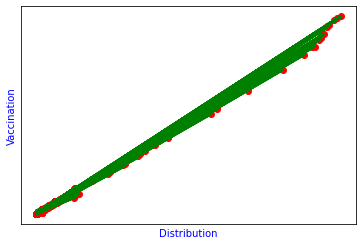

In [92]:
plt.scatter(x_t_test[:,0], y_t_test, color='red')
plt.plot(x_t_test[:,0], y_t_pred, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Distribution', color='b')
plt.ylabel('Vaccination', color='b')

plt.show()